<a href="https://www.kaggle.com/jaganadhg/fb-live-selling-data-analysis?scriptVersionId=88570951" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Introduction**

The 'Facebook Live Sellers in Thailand' is a dataset curated in UCI Machine Learning Datasets. The data contains 7050 observations and twelve attributes. The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection. Details and academic publications relating to the data is available from the source https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand. 


In [1]:
%matplotlib inline
import os
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sl


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv


# Data Analysis

In [2]:
data = pd.read_csv("/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv")

In [3]:
data.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN


The columns Column1,Column2,Column3,Column4 are not part of the original data. These colums might have appeared in the data due to format conversion. We will exclude these columns from the analysis. 

In [4]:
data = data[data.columns[:-4]]
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


From the pandas DataFrame meta information, it is evident that the data is complete w.r.f to the description. There are 7050 entries, and no null values are reported here. Let's proceed to expalore the data!


In [6]:
data.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

From the unique value counts, it is evident that from the 7050 observations, only 6997 is unique live selling status. There are four types of status available in the data. From this, we can infer that around 53 observations may be duplicated or some other business phenomena are involved in the status_id column.

In [7]:
duplicated_data = data[data['status_id'].duplicated() == True]

In [8]:
duplicated_data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0
1729,246675545449582_429583263825475,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0
6221,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0
6223,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0


In [9]:
duplicated_data.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6267,819700534875473_955743124604546,photo,3/22/2018 3:48,879,165,18,867,4,8,0,0,0
6268,819700534875473_955149101330615,photo,3/21/2018 1:15,114,6,1,108,3,3,0,0,0
6269,819700534875473_954387151406810,photo,3/20/2018 1:54,186,15,1,172,3,11,0,0,0
6270,819700534875473_953048221540703,photo,3/18/2018 4:28,1985,39,21,1961,11,12,0,1,0
6271,819700534875473_951614605017398,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0


In [10]:
data[data.status_id == '246675545449582_326883450762124']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
1488,246675545449582_326883450762124,photo,2/14/2014 3:07,211,2,0,211,0,0,0,0,0
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0


In [11]:
data[data.status_id == '819700534875473_1002372733274918']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6170,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0
6221,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0


In [12]:
data[data.status_id == '819700534875473_955149101330615']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6217,819700534875473_955149101330615,photo,3/21/2018 1:15,114,6,1,108,3,3,0,0,0
6268,819700534875473_955149101330615,photo,3/21/2018 1:15,114,6,1,108,3,3,0,0,0


In [13]:
data[data.status_id == '819700534875473_951614605017398']

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
6220,819700534875473_951614605017398,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0
6271,819700534875473_951614605017398,photo,3/16/2018 1:57,985,71,42,962,5,16,2,0,0


From the samples evaluated, it is evident that the 53 observations are duplicate. We will proceed and remove the duplicated by the status_id column. 

In [14]:
data_ndp = data.drop_duplicates(subset='status_id',
                               keep='last')
data_ndp.shape

(6997, 12)

Now we have only 6997 observation in the dataset. Let's explore the status type and other attributes in the data to gain further insights. 

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Status Type')]

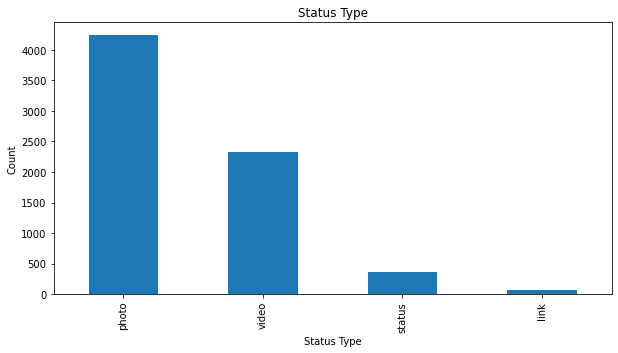

In [15]:
st_ax = data_ndp.status_type.value_counts().plot(kind='bar',
                                        figsize=(10,5),
                                        title="Status Type")
st_ax.set(xlabel="Status Type", ylabel="Count")

Most of the sellers seem to be using a photo or video as status for the selling. A tiny portion of the users is depending on text status or URL/link for posting an advertisement. 

In [16]:
data_ndp.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0


The num_reaction column seems to be a sum of following colums.

*  num_reaction = sum(num_likes, num_loves,num_wows,num_hahas,num_sads,num_angrys)


Let's validate the assumption.

In [17]:
data_ndp['all_reaction_count'] = data_ndp.iloc[:,-6:].sum(axis=1)

In [18]:
data_ndp['reactio_match'] = data_ndp.apply(lambda x: x['num_reactions'] == x['all_reaction_count'],
                                           axis=1)

In [19]:
data_react_mismatch = data_ndp[data_ndp.reactio_match == False]
data_react_mismatch.shape

(9, 14)

There are nine observations where the assumption mentioned above is invalid. Let's examine the difference and reasons behind this. Since only nine observations are there, we can even remove these observations from the data due to inconsistency issues. But it is worthwhile to examine the reason. 

In [20]:
data_react_mismatch["diff_react"] = data_react_mismatch.num_reactions - data_react_mismatch.all_reaction_count

In [21]:
data_react_mismatch

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match,diff_react
238,246675545449582_1331955210254938,video,6/25/2017 7:42,885,462,26,659,220,0,2,0,0,881,False,4
247,246675545449582_1320853268031799,photo,6/13/2017 23:17,264,2,0,256,2,5,0,0,0,263,False,1
248,246675545449582_1319907678126358,photo,6/13/2017 1:31,313,3,0,297,7,6,0,0,0,310,False,3
251,246675545449582_1319045328212593,photo,6/12/2017 5:08,247,6,0,234,9,1,0,0,0,244,False,3
253,246675545449582_1318160668301059,photo,6/11/2017 7:04,387,3,0,368,16,1,0,0,0,385,False,2
254,246675545449582_1317164368400689,photo,6/10/2017 8:19,178,9,0,170,6,0,0,0,0,176,False,2
256,246675545449582_1316848781765581,photo,6/10/2017 1:08,270,3,0,256,10,3,0,0,0,269,False,1
257,246675545449582_1315331711917288,photo,6/8/2017 9:26,351,4,1,344,6,0,0,0,0,350,False,1
293,246675545449582_1262985247151935,video,4/20/2017 2:36,616,523,21,459,125,21,8,0,1,614,False,2


Let's check if the duplicate records cause the mismatch. We created a subset data consists only the duplicated values. Let's run a quick search by the status_id! 

In [22]:
data_react_mismatch[data_react_mismatch['status_id'].isin(list(duplicated_data.status_id.values))]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match,diff_react


And by looking at the numbers, it is evident that comments or shares do not contribute it. Values of those attributes are higher than the difference, and some of the status_is's are not even shared. 

As there is no data available to verify the correctness, we can go for

* Correct the value based on the interactions.
* Drop the nine observations. 

I prefer to correct the values as part of this experiment before we proceed further. 

In [23]:
data_ndp.num_reactions = data_ndp.all_reaction_count

In [24]:
data_ndp['reactio_match'] = data_ndp.apply(lambda x: x['num_reactions'] == x['all_reaction_count'],
                                           axis=1)

In [25]:
data_ndp[data_ndp.reactio_match == False]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match


Now all the reactions_count is matching based on the calculation logic. 

In [26]:
data_ndp.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True


Let's create two variables to understand the reactions to comment and share ratio. Comments and shares show people may be interested and inquiring or maybe complaining. Shares activity indicates that users found it interesting, hence sharing it for other's benefits. 

In [27]:
data_ndp['react_comment_r'] = data_ndp.num_reactions/data_ndp.num_comments
data_ndp['react_share_r'] = data_ndp.num_reactions/data_ndp.num_shares
data_ndp.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match,react_comment_r,react_share_r
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True,1.033203,2.019084
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True,inf,inf
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,227,True,0.961864,3.982456
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,111,True,inf,inf
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,213,True,inf,inf


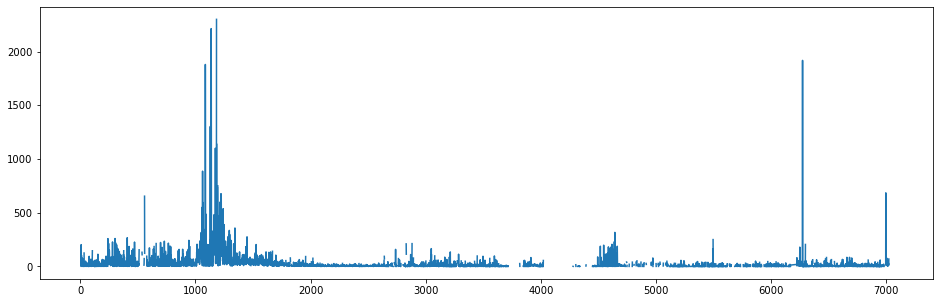

In [28]:
data_ndp.react_comment_r.plot(kind='line',
                             figsize=(16,5))

From the graph, we can see that there are many NaN or Inf values and extreme values in the reactions to comments ratio. The ratio becomes inf while the comments or shares are zero in the count.  The extreme values are something exciting. It may be an indication of data error or a trend in the data and worth investigating. 

In [29]:
data_ndp.replace([np.inf, -np.inf],
                 0.0,
                inplace=True)

In [30]:
data_with_p_reaction = data_ndp[(data_ndp.react_comment_r > 0) &
        (data_ndp.react_comment_r <= 2)]
data_with_p_reaction = data_with_p_reaction[["num_reactions","num_comments","react_comment_r"]]

In [31]:
data_with_p_reaction.shape
data_with_p_reaction.head()

,num_reactions,num_comments,react_comment_r
0,529,512,1.033203
2,227,236,0.961864
6,503,614,0.819218
7,295,453,0.651214
16,135,256,0.527344


In [32]:
data_with_p_reaction.react_comment_r.min(),data_with_p_reaction.react_comment_r.max()

(0.023773207805185926, 2.0)

When comments are less than ten, the reaction to comment ratio becomes higher. It means it created impressions but may not be enough interest in the customer base. At the same time, we can see that the three interaction types in the data 'haha', 'angry,' and 'sad' are there. Knowing Facebook as a social platform, these reactions are expressed in extreme emotions or disappointed by the product. It is work exploring the positive reactions 'likes,' 'loves,' and 'wows.' We can create positive reactions and adverse reactions summary here. 

Positive Reactions = sum('likes,' 'loves,' and 'wows.' )

Negative Reactions = sum('haha', 'angry,' and 'sad' )

With the variables mentioned above, we can check if the reaction to comment ratio is higher for selling attempts with positive comments or negative comments. 

In [33]:
data_ndp.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match,react_comment_r,react_share_r
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True,1.033203,2.019084
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True,0.000000,0.000000


In [34]:
data_ndp['postive_reactions'] = data_ndp.iloc[:,-10:-7].sum(axis=1)
data_ndp.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match,react_comment_r,react_share_r,postive_reactions
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True,1.033203,2.019084,527
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True,0.000000,0.000000,150


In [35]:
data_ndp['negative_reactions'] = data_ndp.iloc[:,-8:-5].sum(axis=1)
data_ndp.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reactio_match,react_comment_r,react_share_r,postive_reactions,negative_reactions
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True,1.033203,2.019084,527,2
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True,0.000000,0.000000,150,0


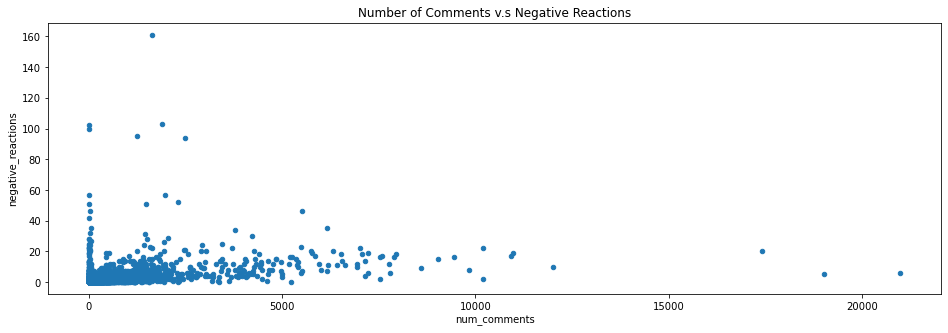

In [36]:
data_ndp.plot.scatter(x='num_comments',
                      y='negative_reactions',
                     figsize=(16,5),
                     title="Number of Comments v.s Negative Reactions")

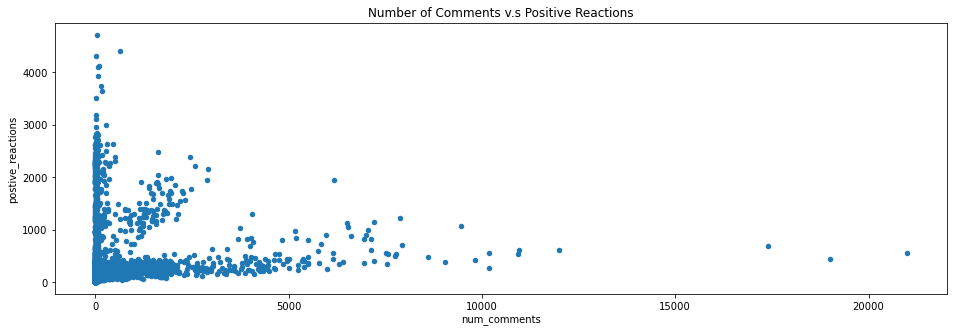

In [37]:
data_ndp.plot.scatter(x='num_comments',
                      y='postive_reactions',
                     figsize=(16,5),
                     title="Number of Comments v.s Positive Reactions")

In [38]:
data_ndp.num_comments.min(),data_ndp.num_comments.max()

(0, 20990)

It looks like low comments and otherwise negative and positive, and reactions are there. Comments to positive responses are much higher than comments to negative. If we extract the respective comments and study the intent and sentiment, that could lead us to fascinating insights. 

# Data Quality Issues and Resolutions

We found the following data quality issues and appropriate remedy implemented. 

1) Duplicate records - There were 53 records duplicated, and we preserved the last records. 

2) Calculated Columns value Mismatch  - The column [num_reactions](http://) column is created by summing the columns num_likes, num_loves,num_wows,num_hahas,num_sads,num_angrys. There was nine instanced where the values are not matching. The values were replaced with correct calculations. 


# New Features and Rationale

As part of the analysis, we created six new features. They are :

all_reaction_count, reactio_match, react_comment_r, react_share_r, postive_reactions, negative_reactions.

all_reaction_count: This feature was generated to check the validity of data 'num_reactions'.  The logic used to create the column is num_reaction = sum(num_likes, num_loves,num_wows,num_hahas,num_sads,num_angrys) .

reactio_match: This is a bool column. If the values are False that means num_reactions and all_reactions_count values are different. 

react_comment_r: reactions to comments ratio. The logic for creating this variable is num_reactions/num_comments 

react_share_r: Reactiont to share ratio. The logic to create the variable is num_reactions/num_shares.

postive_reactions: This is the overall positve reaction count. Logic to generate the column : positive_reactions = sum(num_likes,num_loves,num_wows)

negative_reactions: This variable represents overall negative reactions. Logic to generate the columsn :  negative_reactions = sum(num_hahas, num_sads, num_angrys)


# Clean Data

From the final data, we will exclude the columns all_reaction_count, reactio_match. These columns are created for verification and validation. The rest of the new columns can be removed based on the use case we are framing from the data. 

In [39]:
clean_data = data_ndp.drop(['all_reaction_count','reactio_match'],
                          axis=1)
clean_data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,react_comment_r,react_share_r,postive_reactions,negative_reactions
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,1.033203,2.019084,527,2
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,0.000000,0.000000,150,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0.961864,3.982456,226,1
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,0.000000,0.000000,111,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,0.000000,0.000000,213,0


In [40]:
clean_data.to_csv("clean_data_v1.0.csv",
                  index=False)

# More to Analyze! 

One interesting factor that can be explored form the data is the impact of time in engagements. From the status_published, we can create a segment of a day such as early morning, morning, noon, evening, and night. Another new variable idea will be the days, such as working day or weekend. Generally, Facebook live sellers may be trying to earn a side income and selecting free time from work. The sellers may have a hunch on the best time they are getting audience and revenue. By creating this variable, we may be able to frame a use case. One can create a couple of new Machine Learning use cases from this new data. 


The curators of the dataset, Nassim Dehouche, and Apiradee Wongkitrungrueng, used this data in a paper they presented in a Marketing Conference. The paper details are

Nassim Dehouche and Apiradee Wongkitrungrueng. Facebook Live as a Direct Selling Channel, 2018, Proceedings of ANZMAC 2018: The 20th Conference of the Australian and New Zealand Marketing Academy. Adelaide (Australia), 3-5 December 2018.

Before proceeding with the use cases, it is worth to read this paper. 